In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.stats import norm

# **Importing data**

In [32]:
d1 = pd.read_csv("delivery_time.csv")
d1.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [33]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


# Distribution

<ipython-input-34-8f9ed460b2cf>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d1["Delivery Time"])


<Axes: xlabel='Delivery Time', ylabel='Density'>

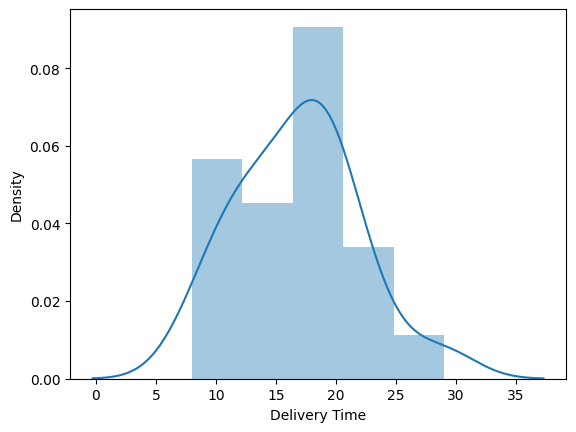

In [34]:
sns.distplot(d1["Delivery Time"])

<ipython-input-35-e2bef988a1de>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d1["Sorting Time"])


<Axes: xlabel='Sorting Time', ylabel='Density'>

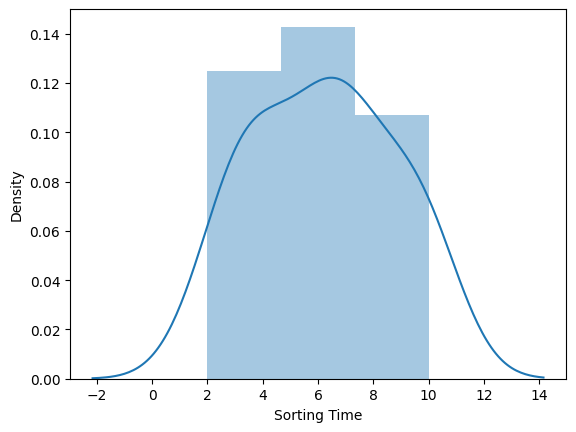

In [35]:
sns.distplot(d1["Sorting Time"])

# Feature engineering (EDA)

In [36]:
#Check for any null values
d1.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

<Axes: >

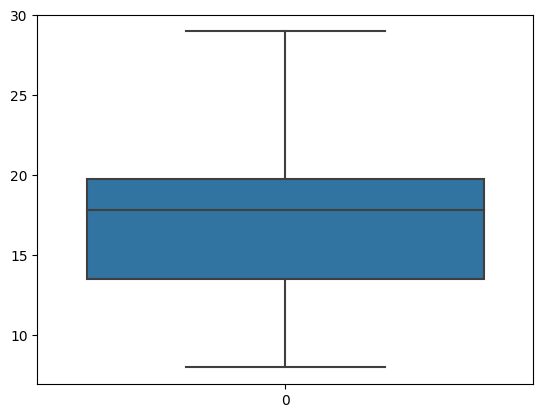

In [37]:
#Both columns are same unit
#Check for ouliers in Delivery time column
sns.boxplot(d1["Delivery Time"])

<Axes: >

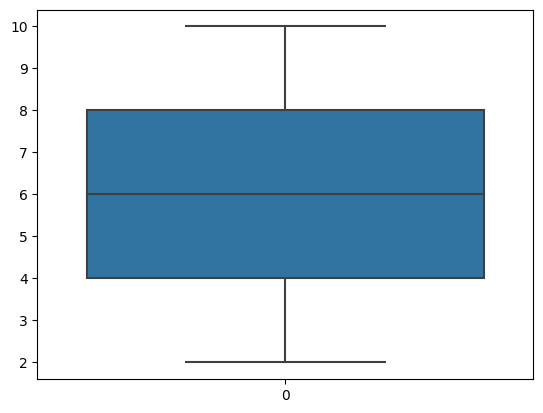

In [38]:
#Check for ouliers in Sorting time column
sns.boxplot(d1["Sorting Time"])

In [39]:
#No outliers present
#Renaming Delivery Time and Sorting Time
d1 = d1.rename(columns={"Delivery Time":"Delivery_time","Sorting Time":"Sorting_time"})
d1

,Delivery_time,Sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# Correlation analysis

In [40]:
d1.corr()

,Delivery_time,Sorting_time
Delivery_time,1.000000,0.825997
Sorting_time,0.825997,1.000000


In [41]:
#Delivery time and sorting time has a positive correlation. Its value almost near to 1

<Axes: xlabel='Sorting_time', ylabel='Delivery_time'>

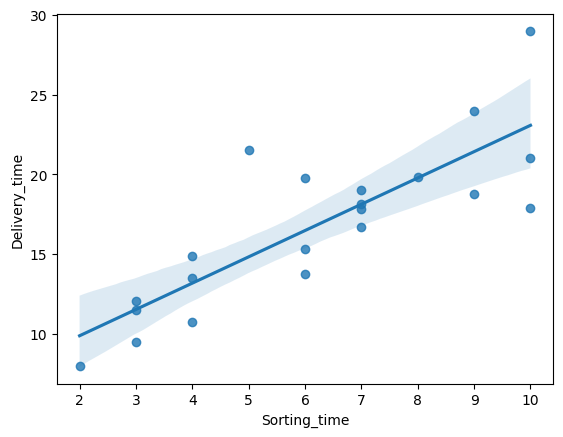

In [42]:
sns.regplot(x="Sorting_time", y="Delivery_time", data=d1)

# SLR Model Building

In [43]:
import statsmodels.formula.api as smf
model = smf.ols("Delivery_time~Sorting_time",data=d1).fit()

# Model Summary

In [14]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 01 Nov 2023   Prob (F-statistic):           3.98e-06
Time:                        11:47:36   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
# Finding Coefficient parameters
model.params

Intercept       6.582734
Sorting_time    1.649020
dtype: float64

In [45]:
# Finding tvalues and pvalues
model.tvalues , model.pvalues

(Intercept       3.823349
 Sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 Sorting_time    0.000004
 dtype: float64)

In [46]:
# Finding Rsquared Values
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [53]:
pred = model.predict(d1['Sorting_time'])
rmse = np.sqrt(np.mean((np.array(d1["Sorting_time"])-np.array(pred))**2))
rmse

10.72205239210456

In [18]:
#R squre value is low so creating other model

# Transformation of model by Squaring independent variable

In [59]:
model1 = smf.ols("Delivery_time~Sorting_time**2",data=d1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 01 Nov 2023   Prob (F-statistic):           3.98e-06
Time:                        11:58:16   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='Sorting_time', ylabel='Delivery_time'>

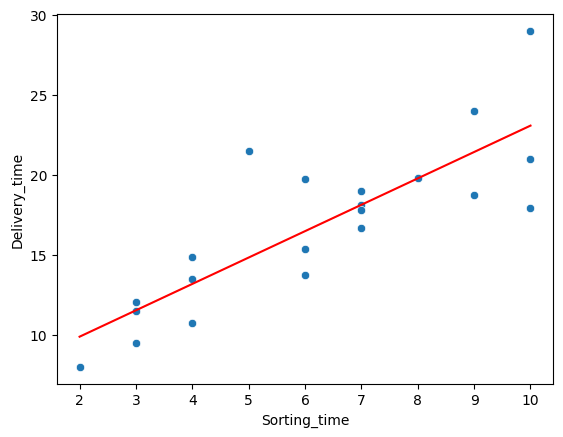

In [56]:
pred_Delivery_time = model1.predict(d1['Sorting_time'])
sns.scatterplot(x="Sorting_time",y="Delivery_time",data=d1)
sns.lineplot(x="Sorting_time",y=pred_Delivery_time,data=d1,color="red")

In [57]:
rmse = np.sqrt(np.mean((np.array(d1["Sorting_time"])-np.array(pred_Delivery_time))**2))
rmse
#No change in rmse value,Take other model

10.72205239210456

# Transformation of model by Square rooting independent variable

In [60]:
model2 = smf.ols("Delivery_time~np.sqrt(Sorting_time)",data=d1).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_time   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     43.46
Date:                Wed, 01 Nov 2023   Prob (F-statistic):           2.61e-06
Time:                        12:01:57   Log-Likelihood:                -50.900
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -2.5188      2.995     -0.841      0.411      -8.788       3.751
np.sqrt(Sorting_time)     7.9366      1.204      6.592      0.000       5.417      10.456
==============================================================================
Omnibus:                        4.658   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                2.824
Skew:                           0.865   Prob(JB):                        0.244
Kurtosis:                       3.483   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='Sorting_time', ylabel='Delivery_time'>

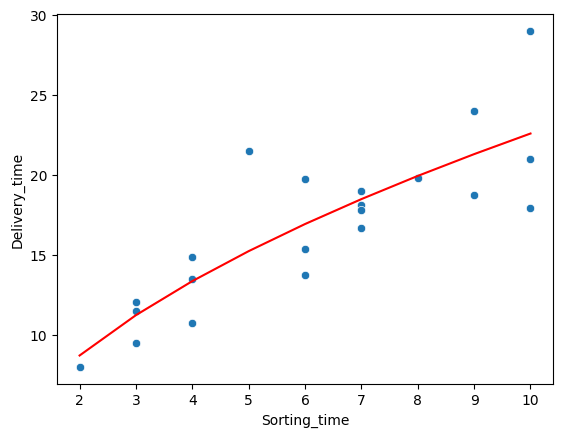

In [61]:
pred_Delivery_time = model2.predict(d1['Sorting_time'])
sns.scatterplot(x="Sorting_time",y="Delivery_time",data=d1)
sns.lineplot(x="Sorting_time",y=pred_Delivery_time,data=d1,color="red")

In [62]:
rmse = np.sqrt(np.mean((np.array(d1["Sorting_time"])-np.array(pred_Delivery_time))**2))
rmse

10.733248040710821

In [ ]:
#Slight change in r square and rmse value

# Transformation of model by Square rooting both independent variable and dependent variable

In [63]:
model3 = smf.ols("np.sqrt(Delivery_time)~np.sqrt(Sorting_time)",data=d1).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.sqrt(Delivery_time)   R-squared:                       0.729
Model:                                OLS   Adj. R-squared:                  0.715
Method:                     Least Squares   F-statistic:                     51.16
Date:                    Wed, 01 Nov 2023   Prob (F-statistic):           8.48e-07
Time:                            12:05:04   Log-Likelihood:                -5.7320
No. Observations:                      21   AIC:                             15.46
Df Residuals:                          19   BIC:                             17.55
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.6135      0.349      4.628      0.000       0.884       2.343
np.sqrt(Sorting_time)     1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='Sorting_time', ylabel='Delivery_time'>

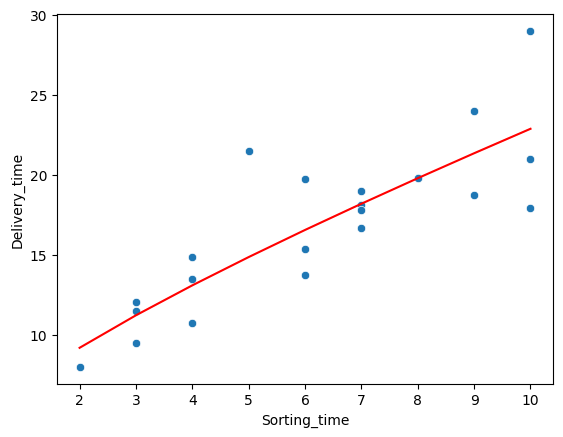

In [64]:
pred_Delivery_time = model3.predict(d1['Sorting_time'])
pred_Delivery_time = pred_Delivery_time**2
sns.scatterplot(x="Sorting_time",y="Delivery_time",data=d1)
sns.lineplot(x="Sorting_time",y=pred_Delivery_time,data=d1,color="red")

In [65]:
rmse = np.sqrt(np.mean((np.array(d1["Sorting_time"])-np.array(pred_Delivery_time))**2))
rmse
#rmse value decreased

10.635251257174312

# Transformation of model by Cube rooting independent variable

In [72]:
model4 = smf.ols("Delivery_time~np.cbrt(Sorting_time)",data=d1).fit()
model4.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_time   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     43.79
Date:                Wed, 01 Nov 2023   Prob (F-statistic):           2.48e-06
Time:                        12:16:49   Log-Likelihood:                -50.844
No. Observations:                  21   AIC:                             105.7
Df Residuals:                      19   BIC:                             107.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               -11.5792      4.332     -2.673      0.015     -20.647      -2.511
np.cbrt(Sorting_time)    15.7673      2.383      6.618      0.000      10.780      20.754
==============================================================================
Omnibus:                        4.963   Durbin-Watson:                   1.351
Prob(Omnibus):                  0.084   Jarque-Bera (JB):                3.050
Skew:                           0.896   Prob(JB):                        0.218
Kurtosis:                       3.525   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='Sorting_time', ylabel='Delivery_time'>

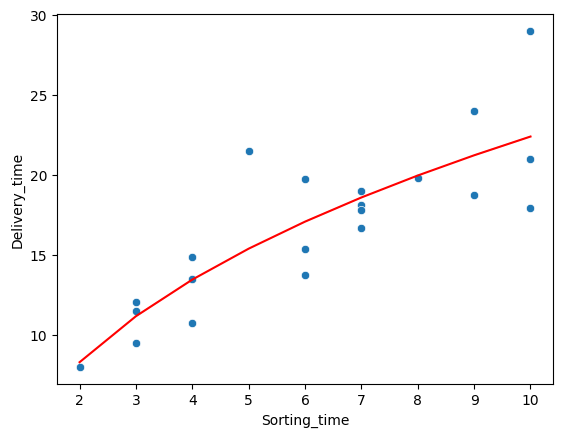

In [73]:
#Accuracy less
pred_Delivery_time = model4.predict(d1['Sorting_time'])
sns.scatterplot(x="Sorting_time",y="Delivery_time",data=d1)
sns.lineplot(x="Sorting_time",y=pred_Delivery_time,data=d1,color="red")

In [74]:
rmse = np.sqrt(np.mean((np.array(d1["Sorting_time"])-np.array(pred_Delivery_time))**2))
rmse
#rmse value increased and accuracy less

10.73813607103123

# Transformation of model by take log on both variable

In [80]:
model5 = smf.ols("np.log(Delivery_time)~np.log(Sorting_time)",data=d1).fit()

In [20]:
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      log_Delivery_time   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Wed, 01 Nov 2023   Prob (F-statistic):           1.60e-07
Time:                        11:47:36   Log-Likelihood:                 10.291
No. Observations:                  21   AIC:                            -16.58
Df Residuals:                      19   BIC:                            -14.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.7420      0.133     13.086      0.000       1.463       2.021
log_Sorting_time     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='Sorting_time', ylabel='Delivery_time'>

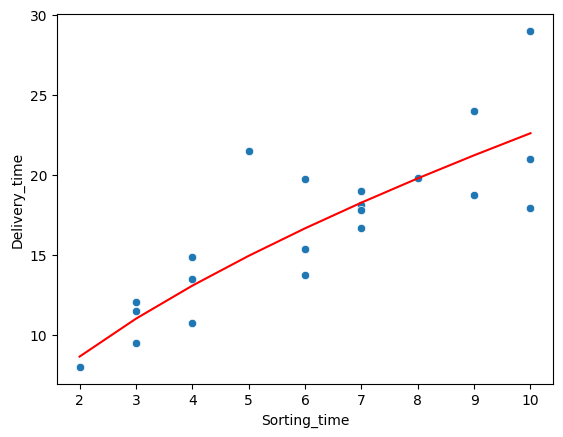

In [82]:
pred_Delivery_time = model5.predict(d1['Sorting_time'])
pred_Delivery_time = np.exp(pred_Delivery_time)
d1["Pred_Delivery_time"] = pred_Delivery_time
sns.scatterplot(x="Sorting_time",y="Delivery_time",data=d1)
sns.lineplot(x="Sorting_time",y=pred_Delivery_time,data=d1,color="red")

In [81]:
d1["log_Sorting_time"] =np.log(d1["Sorting_time"])
d1["log_Delivery_time"] = np.log(d1["Delivery_time"])
d1

,Delivery_time,Sorting_time,log_Sorting_time,log_Delivery_time
0,21.00,10,2.302585,3.044522
1,13.50,4,1.386294,2.602690
2,19.75,6,1.791759,2.983153
3,24.00,9,2.197225,3.178054
4,29.00,10,2.302585,3.367296
5,15.35,6,1.791759,2.731115
6,19.00,7,1.945910,2.944439
7,9.50,3,1.098612,2.251292
8,17.90,10,2.302585,2.884801
9,18.75,9,2.197225,2.931194


In [84]:
rmse = np.sqrt(np.mean((np.array(d1["Sorting_time"])-np.array(pred_Delivery_time))**2))
rmse
#rmse value less and accuracy increased

10.562323684996143

# Model Prediction

In [77]:
# Automatic Prediction for say sorting time 5, 8
new_data=pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [89]:
data_sort = pd.DataFrame(new_data,columns=["Sorting_time"])
data_sort

,Sorting_time
0,5
1,8


In [90]:
pred_val = model5.predict(data_sort)
pred_val

0    2.703662
1    2.984500
dtype: float64

In [91]:
Final_result = pd.DataFrame({'sorting_time': data_sort['Sorting_time'],'Predicted_value' :np.exp(pred_val)})
Final_result

,sorting_time,Predicted_value
0,5,14.934324
1,8,19.776608
